# Model Report

In [1]:
import logging
from time import time
from typing import Optional

import arviz as az
import matplotlib.pyplot as plt

from speclet import model_configuration
from speclet.analysis.arviz_analysis import describe_mcmc, summarize_rhat
from speclet.bayesian_models import get_bayesian_model
from speclet.io import project_root
from speclet.loggers import set_console_handler_level
from speclet.managers.cache_manager import (
    get_cached_posterior,
    get_posterior_cache_name,
)
from speclet.project_configuration import get_bayesian_modeling_constants
from speclet.project_enums import ModelFitMethod

/home/jc604/.conda/envs/speclet_smk/bin/../lib/gcc/x86_64-conda-linux-gnu/10.3.0/../../../../x86_64-conda-linux-gnu/bin/ld: /n/app/gcc/6.2.0/lib64/libquadmath.so.0: undefined reference to `memcpy@GLIBC_2.14'
collect2: error: ld returned 1 exit status
/home/jc604/.conda/envs/speclet_smk/bin/../lib/gcc/x86_64-conda-linux-gnu/10.3.0/../../../../x86_64-conda-linux-gnu/bin/ld: /n/app/gcc/6.2.0/lib64/libquadmath.so.0: undefined reference to `memcpy@GLIBC_2.14'
collect2: error: ld returned 1 exit status
/home/jc604/.conda/envs/speclet_smk/bin/../lib/gcc/x86_64-conda-linux-gnu/10.3.0/../../../../x86_64-conda-linux-gnu/bin/ld: /n/app/gcc/6.2.0/lib64/libquadmath.so.0: undefined reference to `memcpy@GLIBC_2.14'
collect2: error: ld returned 1 exit status
/home/jc604/.conda/envs/speclet_smk/bin/../lib/gcc/x86_64-conda-linux-gnu/10.3.0/../../../../x86_64-conda-linux-gnu/bin/ld: /n/app/gcc/6.2.0/lib64/libquadmath.so.0: undefined reference to `memcpy@GLIBC_2.14'
collect2: error: ld returned 1 exit sta

In [2]:
notebook_tic = time()
set_console_handler_level(logging.WARNING)
%config InlineBackend.figure_format = "retina"
HDI_PROB = get_bayesian_modeling_constants().hdi_prob

Parameters for papermill:

- `MODEL_NAME`: name of the model
- `FIT_METHOD`: method used to fit the model; either "ADVI" or "MCMC"
- `CONFIG_PATH`: path to configuration file
- `ROOT_CACHE_DIR`: path to the root caching directory

## Setup

### Papermill parameters

In [3]:
CONFIG_PATH = ""
MODEL_NAME = ""
FIT_METHOD_STR = ""
ROOT_CACHE_DIR = ""

In [4]:
# Parameters
MODEL_NAME = "hnb-small-data_v2"
FIT_METHOD_STR = "PYMC_MCMC"
CONFIG_PATH = "models/model-configs.yaml"
ROOT_CACHE_DIR = "models"

In [5]:
FIT_METHOD = ModelFitMethod(FIT_METHOD_STR)
model_config = model_configuration.get_configuration_for_model(
    config_path=project_root() / CONFIG_PATH, name=MODEL_NAME
)
model = get_bayesian_model(model_config.model)()
trace = get_cached_posterior(
    get_posterior_cache_name(MODEL_NAME, FIT_METHOD),
    cache_dir=project_root() / ROOT_CACHE_DIR,
)

## Fit diagnostics

In [6]:
if FIT_METHOD.value in {ModelFitMethod.PYMC_MCMC, ModelFitMethod.PYMC_NUMPYRO}:
    print("R-HAT")
    rhat_summ = summarize_rhat(trace)
    print(rhat_summ)
    print("=" * 60)
    describe_mcmc(trace)

## Model predictions

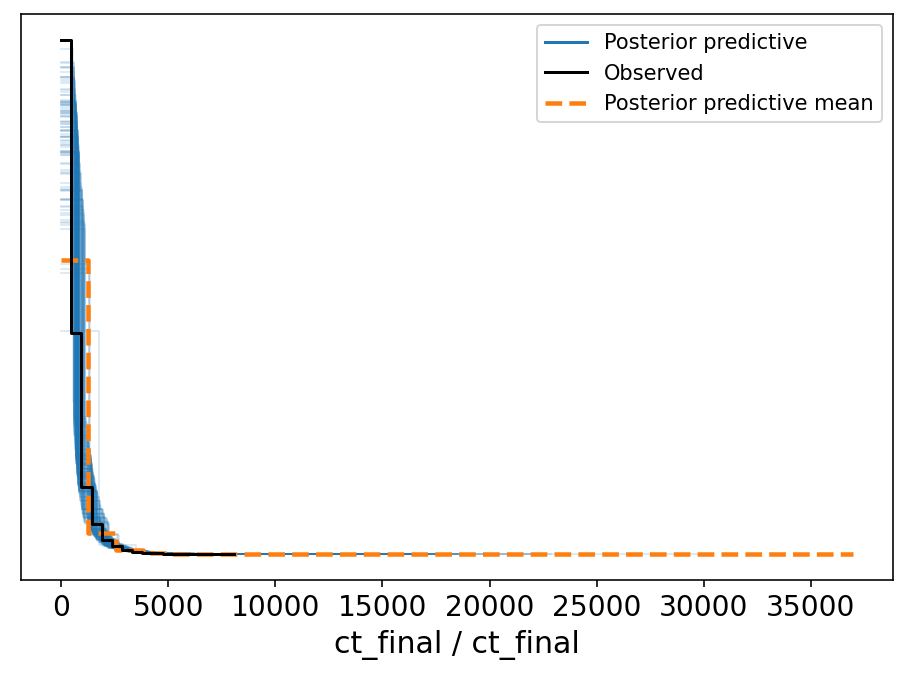

In [7]:
az.plot_ppc(trace, num_pp_samples=100, random_seed=123)
plt.tight_layout()
plt.show()

In [8]:
psis_loo = az.loo(trace, pointwise=True)
psis_loo

Computed from 4000 by 39758 log-likelihood matrix

         Estimate       SE
elpd_loo -268397.62   224.19
p_loo      395.72        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     39757  100.0%
 (0.5, 0.7]   (ok)           1    0.0%
   (0.7, 1]   (bad)          0    0.0%
   (1, Inf)   (very bad)     0    0.0%

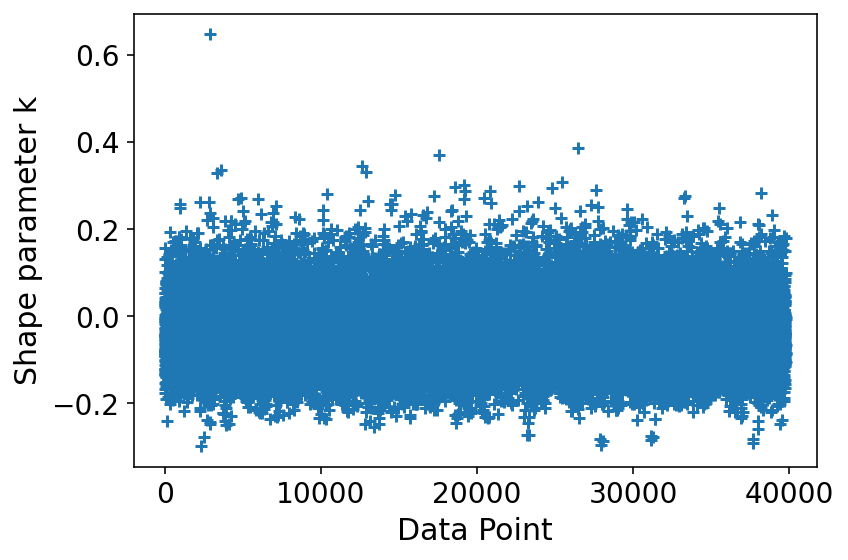

In [9]:
az.plot_khat(psis_loo)
plt.tight_layout()
plt.show()

---

In [10]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 10.02 minutes


In [11]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2022-05-21

Python implementation: CPython
Python version       : 3.10.4
IPython version      : 8.3.0

Compiler    : GCC 10.3.0
OS          : Linux
Release     : 3.10.0-1160.45.1.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

Hostname: compute-a-16-169.o2.rc.hms.harvard.edu

Git branch: modeling-color-panc-eso

logging   : 0.5.1.2
arviz     : 0.12.0
matplotlib: 3.5.2
speclet   : 0.0.9000

